In [1]:
# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading csv file
df=pd.read_csv('Mushroom.csv')
df

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# Creating DataFrame
df_Mushroom=pd.DataFrame(data=df)
df_Mushroom

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


###   It is Categorical data thus i will use Logistic Regression and Classification Model.

In [4]:
#checking Null values
df_Mushroom.isnull().sum()

classes                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df_Mushroom.dtypes

classes                     object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['classes','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
for val in list1:
    df_Mushroom[val]=le.fit_transform(df_Mushroom[val].astype(str))

(23.0, 0.0)

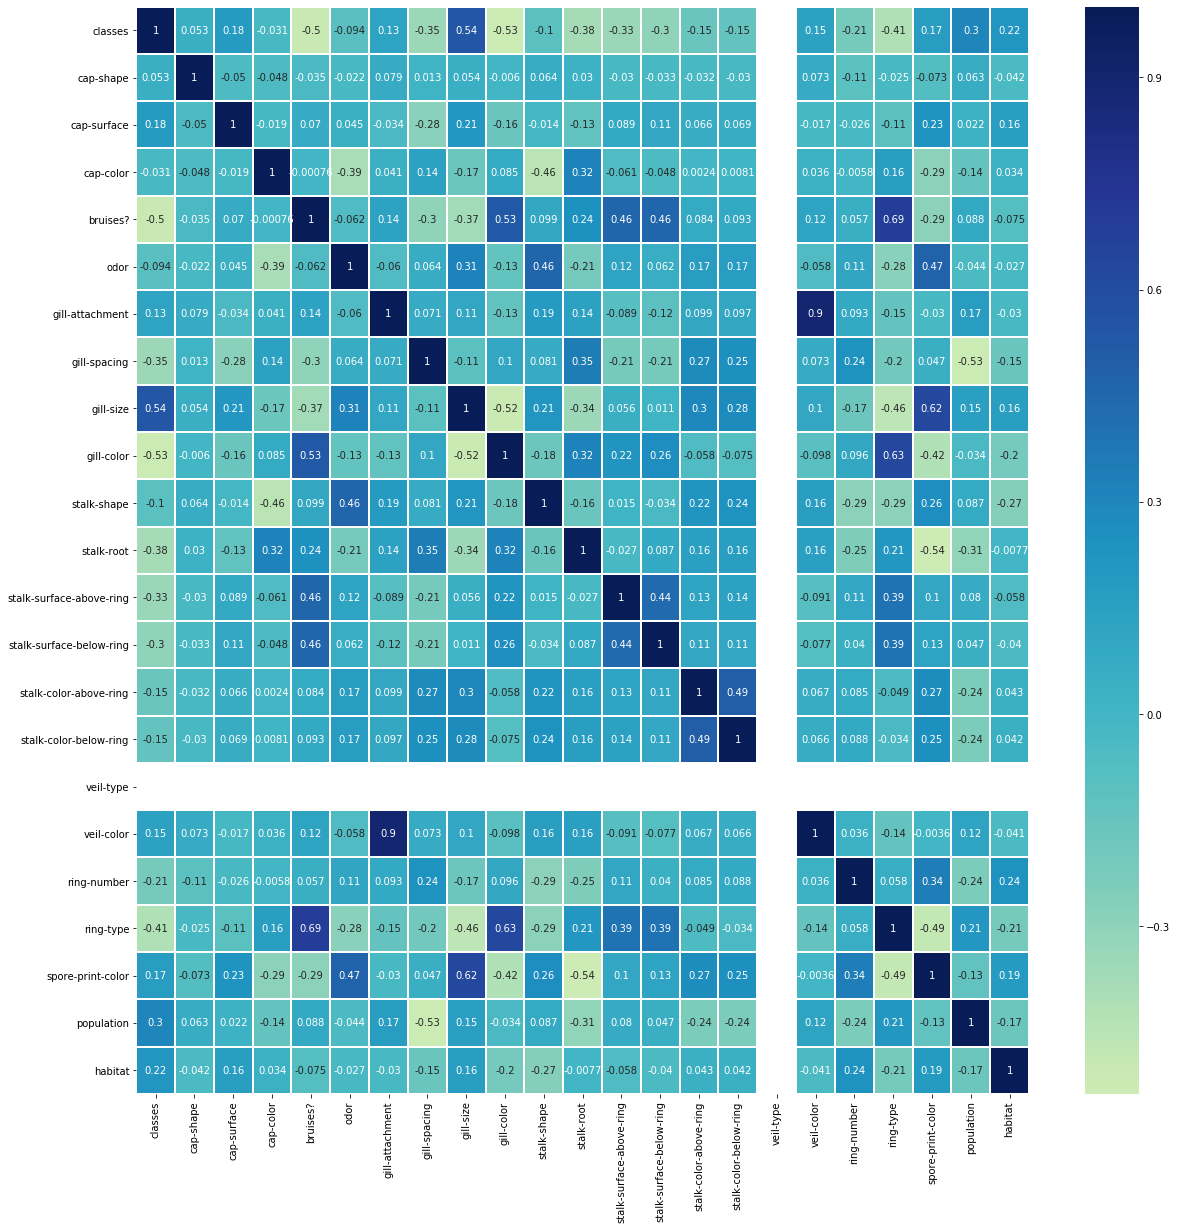

In [7]:
# Plotting Heatmap
fig, ax =plt.subplots(figsize=(20,20))
sns.heatmap(df_Mushroom.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [8]:
target=df_Mushroom['classes']
target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: classes, Length: 8124, dtype: int32

In [9]:
d=df_Mushroom.drop('classes',axis=1)
d

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [10]:
df_Mushroom.skew()

classes                     0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises?                    0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

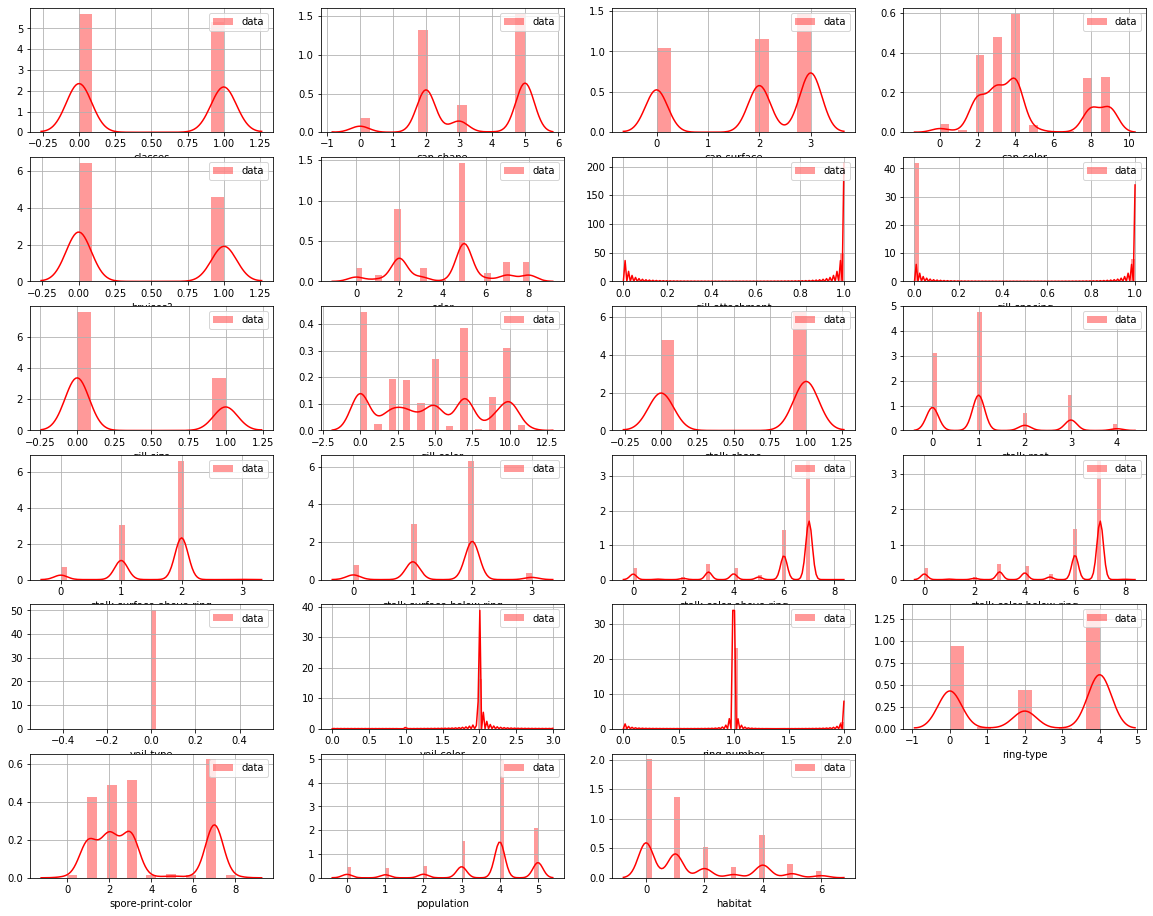

In [11]:
# Plotting DistPlot
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_Mushroom.columns.values)):
    plt.subplot(6,4,i+1)
    sns.distplot(df_Mushroom[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [12]:
# Using PCA to get highly correlated Columns
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
mpca=pca.fit_transform(d)
mpca

array([[ 0.22820662, -0.34547209, -1.42442514, ...,  3.64358855,
        -0.92581182,  0.36680766],
       [-1.93656097,  4.79691211, -3.51166784, ..., -0.61776406,
         0.23213088,  0.07507515],
       [-1.65417317,  2.46436226, -3.88082715, ...,  0.66746969,
        -0.18841658,  0.33120588],
       ...,
       [-1.86050705,  0.47024368,  1.19021189, ...,  1.09550111,
        -0.23495457, -0.25898422],
       [ 7.29306843, -1.25169255, -1.24197629, ...,  1.25810698,
        -0.31653774, -0.58907278],
       [-4.83553281, -3.58375805, -0.11250607, ..., -0.42149836,
         0.42627554, -0.06795613]])

In [13]:
df_new=pd.DataFrame(data=mpca)
df_new

,0,1,2,3,4,5,6,7,8,9
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,2.645915,-1.032036,3.643589,-0.925812,0.366808
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,-0.283909,2.550317,-0.617764,0.232131,0.075075
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.052608,-2.190863,0.667470,-0.188417,0.331206
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,2.792790,-0.396476,4.161473,-1.013877,-0.498926
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,3.301132,-1.258234,-2.004355,0.602214,-1.342796
...,...,...,...,...,...,...,...,...,...,...
8119,-6.469823,-2.308511,0.588111,1.118114,0.617045,1.426498,-1.800509,0.158004,0.106866,-0.649487
8120,-6.525909,-2.280695,1.431399,0.329901,0.274762,1.946724,0.208437,1.467637,-0.291823,-0.433137
8121,-1.860507,0.470244,1.190212,-0.306579,0.364383,0.053368,-2.843708,1.095501,-0.234955,-0.258984
8122,7.293068,-1.251693,-1.241976,0.781739,-1.592310,0.043870,-0.311706,1.258107,-0.316538,-0.589073


In [14]:
# checking skewness
df_new.skew()

0    0.635138
1    0.574512
2    0.444208
3    0.793095
4    0.741290
5    0.189428
6   -0.053544
7   -0.097630
8    0.022523
9    0.311111
dtype: float64

In [15]:
df_new[10]=target

In [16]:
df_new

,0,1,2,3,4,5,6,7,8,9,10
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,2.645915,-1.032036,3.643589,-0.925812,0.366808,1
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,-0.283909,2.550317,-0.617764,0.232131,0.075075,0
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,-6.469823,-2.308511,0.588111,1.118114,0.617045,1.426498,-1.800509,0.158004,0.106866,-0.649487,0
8120,-6.525909,-2.280695,1.431399,0.329901,0.274762,1.946724,0.208437,1.467637,-0.291823,-0.433137,0
8121,-1.860507,0.470244,1.190212,-0.306579,0.364383,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0
8122,7.293068,-1.251693,-1.241976,0.781739,-1.592310,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1


In [17]:
# Removing Skewness
for i in df_new.columns:
    if df_new.skew().loc[i]>0.55:
        df_new[i]=np.log1p(df_new[i])

In [18]:
df_new.skew()

0    -1.093706
1    -1.394667
2     0.444208
3    -1.323269
4    -1.457443
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

In [19]:
df_new

,0,1,2,3,4,5,6,7,8,9,10
0,0.205555,-0.423841,-1.424425,NaN,1.127762,2.645915,-1.032036,3.643589,-0.925812,0.366808,1
1,NaN,1.757325,-3.511668,NaN,0.438993,-0.283909,2.550317,-0.617764,0.232131,0.075075,0
2,NaN,1.242529,-3.880827,0.798635,0.714892,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0
3,NaN,0.985691,-3.565488,0.461844,0.518506,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1
4,0.948262,NaN,-1.255760,NaN,0.067932,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,NaN,NaN,0.588111,0.750526,0.480600,1.426498,-1.800509,0.158004,0.106866,-0.649487,0
8120,NaN,NaN,1.431399,0.285104,0.242760,1.946724,0.208437,1.467637,-0.291823,-0.433137,0
8121,NaN,0.385428,1.190212,-0.366118,0.310703,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0
8122,2.115420,NaN,-1.241976,0.577590,NaN,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1


In [20]:
df_new.isnull().sum()

0     4025
1     3438
2        0
3     2428
4     2350
5        0
6        0
7        0
8        0
9        0
10       0
dtype: int64

In [21]:
#filling up NaN values with mean
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(df_new)
df_data=imp.fit_transform(df_new.values)
print(df_data)
df_final=pd.DataFrame(data=df_data,columns=df_new.columns)
df_final

[[ 0.20555508 -0.42384105 -1.42442514 ... -0.92581182  0.36680766
   1.        ]
 [ 0.80518601  1.75732538 -3.51166784 ...  0.23213088  0.07507515
   0.        ]
 [ 0.80518601  1.24252856 -3.88082715 ... -0.18841658  0.33120588
   0.        ]
 ...
 [ 0.80518601  0.38542815  1.19021189 ... -0.23495457 -0.25898422
   0.        ]
 [ 2.11542004  0.54171536 -1.24197629 ... -0.31653774 -0.58907278
   1.        ]
 [ 0.80518601  0.54171536 -0.11250607 ...  0.42627554 -0.06795613
   0.        ]]


,0,1,2,3,4,5,6,7,8,9,10
0,0.205555,-0.423841,-1.424425,0.189033,1.127762,2.645915,-1.032036,3.643589,-0.925812,0.366808,1.0
1,0.805186,1.757325,-3.511668,0.189033,0.438993,-0.283909,2.550317,-0.617764,0.232131,0.075075,0.0
2,0.805186,1.242529,-3.880827,0.798635,0.714892,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0.0
3,0.805186,0.985691,-3.565488,0.461844,0.518506,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1.0
4,0.948262,0.541715,-1.255760,0.189033,0.067932,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0.805186,0.541715,0.588111,0.750526,0.480600,1.426498,-1.800509,0.158004,0.106866,-0.649487,0.0
8120,0.805186,0.541715,1.431399,0.285104,0.242760,1.946724,0.208437,1.467637,-0.291823,-0.433137,0.0
8121,0.805186,0.385428,1.190212,-0.366118,0.310703,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0.0
8122,2.115420,0.541715,-1.241976,0.577590,0.095623,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1.0


In [22]:
df_final.skew()

0    -1.539458
1    -1.836097
2     0.444208
3    -1.580207
4    -1.728643
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

In [23]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df_final))
print(df_final.shape)
df_mush=df_final.loc[(z<3).all(axis=1)]
print(df_mush.shape)

(8124, 11)
(7311, 11)


In [24]:
df_mush

,0,1,2,3,4,5,6,7,8,9,10
0,0.205555,-0.423841,-1.424425,0.189033,1.127762,2.645915,-1.032036,3.643589,-0.925812,0.366808,1.0
1,0.805186,1.757325,-3.511668,0.189033,0.438993,-0.283909,2.550317,-0.617764,0.232131,0.075075,0.0
2,0.805186,1.242529,-3.880827,0.798635,0.714892,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0.0
3,0.805186,0.985691,-3.565488,0.461844,0.518506,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1.0
4,0.948262,0.541715,-1.255760,0.189033,0.067932,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0.805186,0.541715,0.588111,0.750526,0.480600,1.426498,-1.800509,0.158004,0.106866,-0.649487,0.0
8120,0.805186,0.541715,1.431399,0.285104,0.242760,1.946724,0.208437,1.467637,-0.291823,-0.433137,0.0
8121,0.805186,0.385428,1.190212,-0.366118,0.310703,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0.0
8122,2.115420,0.541715,-1.241976,0.577590,0.095623,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1.0


In [25]:
df_mush.skew()

0    -0.689138
1    -0.874950
2     0.277022
3    -0.600155
4    -0.558510
5     0.188872
6    -0.100032
7    -0.104037
8    -0.117295
9     0.331162
10    0.089013
dtype: float64

In [26]:
x1=df_mush.iloc[: ,0:-1]
x1.shape

(7311, 10)

In [27]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.817273,-1.280026,-0.536647,-0.061830,1.175454,1.647365,-0.666787,2.595993,-0.752888,0.325197
1,-0.107413,1.453578,-1.416245,-0.061830,0.336204,-0.162008,1.622214,-0.411720,0.199383,0.069541
2,-0.107413,0.808395,-1.571815,0.743802,0.672380,-1.254304,-1.407238,0.495413,-0.146468,0.293998
3,-0.107413,0.486507,-1.438926,0.298709,0.433088,1.738071,-0.260686,2.961522,-0.825312,-0.433478
4,0.061964,-0.069917,-0.465569,-0.061830,-0.115925,2.052008,-0.811320,-1.390393,0.503733,-1.172992
...,...,...,...,...,...,...,...,...,...,...
7306,-0.107413,-0.069917,0.311468,0.680223,0.386902,0.894289,-1.157815,0.135826,0.096368,-0.565420
7307,-0.107413,-0.069917,0.666843,0.065136,0.097098,1.215565,0.125832,1.060180,-0.231507,-0.375824
7308,-0.107413,-0.265788,0.565203,-0.795501,0.179885,0.046285,-1.824384,0.797523,-0.184740,-0.223208
7309,1.443676,-0.069917,-0.459760,0.451676,-0.082185,0.040419,-0.206521,0.912292,-0.251832,-0.512476


In [28]:
y=df_mush.iloc[:,-1]
y.shape

(7311,)

### Using Grid search

In [29]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,cv):
    clf = GridSearchCV(mod,parameters, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [30]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,10)


{'criterion': 'entropy', 'max_depth': 15, 'random_state': 15}


In [31]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters,10)


{'learning_rate': 0.1, 'n_estimators': 1000}


In [32]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,10)

{'n_neighbors': 1}


In [33]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4]}
grid_cv(svc,parameters,10)

{'gamma': 0.001, 'random_state': 1}


In [34]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_cv(lr,parameters,10)

{'C': 1}


In [35]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [100,200, 700],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,10)k

{'max_features': 'auto', 'n_estimators': 100}


In [36]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=23)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.10)
DT=DecisionTreeClassifier(max_depth=4,random_state=10)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
RF=RandomForestClassifier(max_features='auto', n_estimators= 100,)

In [37]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
       # print('r2 score corresponding to random state ',r_state,'is: ',acc_score)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [38]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  51 is: 0.9794903666873834


Learning Score :  0.9794903666873834
Accuracy Score :  0.9794903666873834


Cross Val Score :  0.9043841627438999


roc auc score :  0.979038175738436


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       840
         1.0       0.99      0.97      0.98       769

    accuracy                           0.98      1609
   macro avg       0.98      0.98      0.98      1609
weighted avg       0.98      0.98      0.98      1609



Confusion Matrix:
 [[831   9]
 [ 24 745]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_w

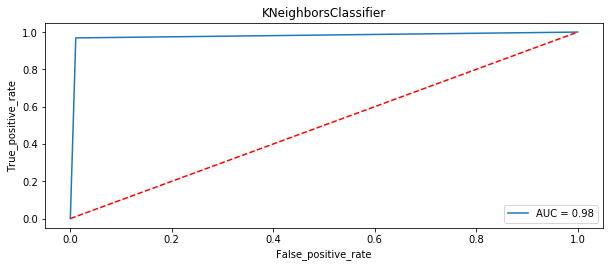

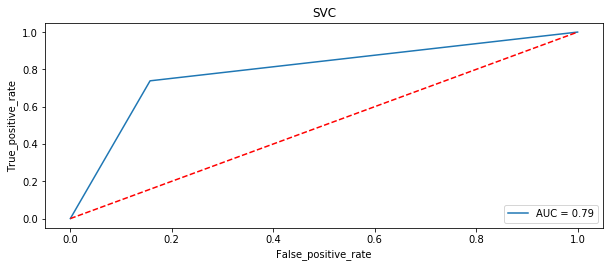

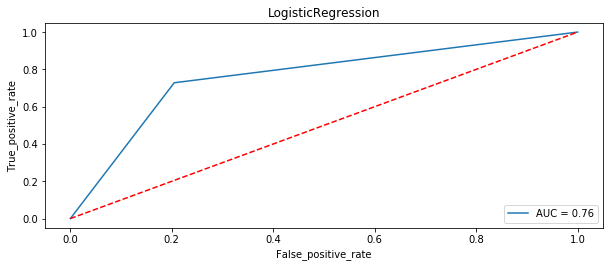

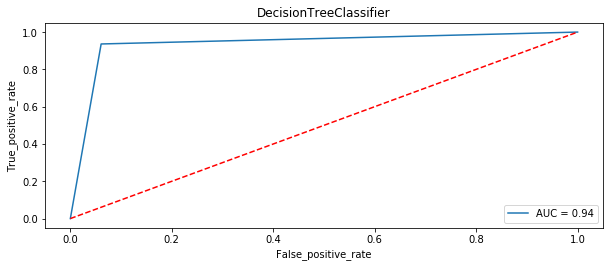

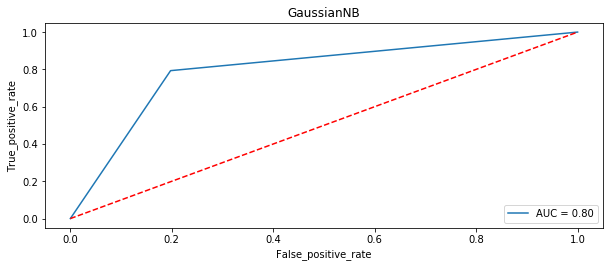

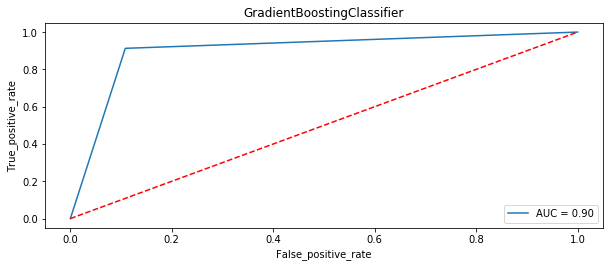

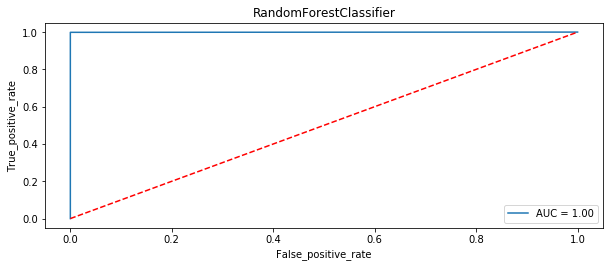

In [39]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_test, y_test)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    
#roc auc score    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    
    
    
    

In [40]:
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score':Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})  
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,97.949037,97.949037,90.438416,97.903818
1,SVC,79.303915,79.303915,71.087869,79.073936
2,LogisticRegression,76.320696,76.320696,68.708163,76.172828
3,DecisionTreeClassifier,93.784960,93.784960,88.169440,93.778330
4,GaussianNB,79.801119,79.801119,68.737637,79.780946
5,GradientBoostingClassifier,90.180236,90.180236,85.515241,90.227026
6,RandomForestClassifier,99.937850,99.937850,94.228012,99.934980


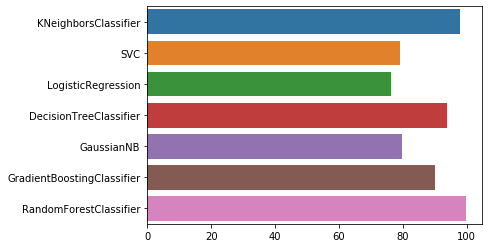

In [41]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

### After all this process conclusion is that RandomForest is performing well.

In [42]:
#RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.22,stratify=y)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Score:',rf.score(x_train,y_train))
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Score: 1.0
Accuracy Score: 0.9993784959602238
Confusion Matrix: [[839   1]
 [  0 769]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       840
         1.0       1.00      1.00      1.00       769

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609



(2.0, 0.0)

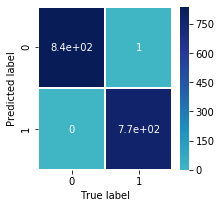

In [43]:
# Plotting Confusion matrix
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, rfpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
test=pd.DataFrame(data=y_test)
test['ypred']=rfpred
test

,10,ypred
4413,1.0,1.0
4172,1.0,1.0
10,0.0,0.0
1744,0.0,0.0
1743,0.0,0.0
...,...,...
5638,0.0,0.0
6651,1.0,1.0
5555,1.0,1.0
706,0.0,0.0


In [45]:
from sklearn.externals import joblib
joblib.dump(rf,'Mushroom_dataset.pkl')

['Mushroom_dataset.pkl']

In [46]:
final=joblib.load('Mushroom_dataset.pkl')
final.predict(x_test)

array([1., 1., 0., ..., 1., 0., 1.])